The DeepCSAT dataset is designed for Customer Satisfaction (CSAT) prediction based on structured and unstructured customer support data. It contains both numerical/categorical features and textual feedback (Customer Remarks).

The target variable is the CSAT Score (typically on a scale of 1 to 5).

The project focuses on predicting the exact CSAT score based on Customer Remarks and other features using Deep Learning Artificial Neural Networks, so that the customer satisfaction can be monitored and enhanced in real time.

#Loading & Reading the data

In [61]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
# copyingcopying data from drive to colab's local memory for fast training

!cp -r /content/drive/MyDrive/eCommerce_Customer_support_data.csv /content/sample_data/



In [63]:
import pandas as pd
df =pd.read_csv('/content/sample_data/eCommerce_Customer_support_data.csv')

In [64]:
df.head(15)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5
5,1cfde5b9-6112-44fc-8f3b-892196137a62,Email,Returns,Fraudulent User,NaN,a2938961-2833-45f1-83d6-678d9555c603,NaN,01/08/2023 15:13,01/08/2023 18:39,01-Aug-23,NaN,NaN,NaN,NaN,Desiree Newton,Emma Park,John Smith,0-30,Morning,5
6,11a3ffd8-1d6b-4806-b198-c60b5934c9bc,Outcall,Product Queries,Product Specific Information,NaN,bfcb562b-9a2f-4cca-aa79-fd4e2952f901,NaN,01/08/2023 15:31,01/08/2023 23:52,01-Aug-23,NaN,NaN,NaN,NaN,Shannon Hicks,Aiden Patel,Olivia Tan,>90,Morning,5
7,372b51a5-fa19-4a31-a4b8-a21de117d75e,Inbound,Returns,Exchange / Replacement,Very good,88537e0b-5ffa-43f9-bbe2-fe57a0f4e4ae,NaN,01/08/2023 16:17,01/08/2023 16:23,01-Aug-23,NaN,NaN,NaN,NaN,Laura Smith,Evelyn Kimura,Jennifer Nguyen,On Job Training,Evening,5
8,6e4413db-4e16-42fc-ac92-2f402e3df03c,Inbound,Returns,Missing,Shopzilla app and it's all coustomer care serv...,e6be9713-13c3-493c-8a91-2137cbbfa7e6,NaN,01/08/2023 21:03,01/08/2023 21:07,01-Aug-23,NaN,NaN,NaN,NaN,David Smith,Nathan Patel,John Smith,>90,Split,5
9,b0a65350-64a5-4603-8b9a-a24a4a145d08,Inbound,Shopzilla Related,General Enquiry,NaN,c7caa804-2525-499e-b202-4c781cb68974,NaN,01/08/2023 23:31,01/08/2023 23:36,01-Aug-23,NaN,NaN,NaN,NaN,Tabitha Ayala,Amelia Tanaka,Michael Lee,31-60,Evening,5


# Basic EDA

In [65]:
df.shape

(85907, 20)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [67]:
# dropping unnecessary columns (features that are not related to target or have large missing values)

df.drop(['Unique id', 'Order_id','connected_handling_time', 'order_date_time', 'Survey_response_Date'], axis=1, inplace=True)


# Missing Value Handling

In [68]:
#imputing the NANs in item price column category wise

df['Item_price'] = df.groupby('category')['Item_price'].transform(
    lambda x: x.fillna(x.median())
)

df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median())


In [69]:
# imputing  NANs in Customer_city and Product_category by Unknown

df['Customer_City'] = df['Customer_City'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Unknown')

In [70]:
# filling nulls in with empty string

df['Customer Remarks'] = df['Customer Remarks'].fillna("")

In [71]:
# handling NaT type values in Date time column

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], dayfirst=True, errors='coerce')
df['issue_responded'] = pd.to_datetime(df['issue_responded'], dayfirst=True, errors='coerce')

In [72]:
# converting the unsupported type to a common format

df['Issue_reported at'] = df['Issue_reported at'].dt.strftime('%#d/%#m/%Y %#H:%M:%S')
df['issue_responded'] = df['issue_responded'].dt.strftime('%#d/%#m/%Y %#H:%M:%S')

In [73]:
# calculating response_time_hrs

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)
df['response_time_hrs'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600


In [74]:
df.drop(['Issue_reported at', 'issue_responded'], axis=1, inplace=True)


# Handling of Categorical Features

In [75]:
# value counts of categorical features

df['channel_name'].value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


In [76]:
df['category'].value_counts()


,count
category,
Returns,44097
Order Related,23215
Refund Related,4550
Product Queries,3692
Shopzilla Related,2792
Payments related,2327
Feedback,2294
Cancellation,2212
Offers & Cashback,480


In [77]:
df['Sub-category'].value_counts()

,count
Sub-category,
Reverse Pickup Enquiry,22389
Return request,8523
Delayed,7388
Order status enquiry,6922
Installation/demo,4116
Fraudulent User,4108
Product Specific Information,3589
Refund Enquiry,2665
Wrong,2597


In [78]:
df['Customer_City'].value_counts()

,count
Customer_City,
Unknown,68828
HYDERABAD,722
NEW DELHI,688
PUNE,435
MUMBAI,406
...,...
JAGGAYYAPET,1
CONTAI,1
ALANGUDI,1


In [79]:
df['Product_category'].value_counts()

,count
Product_category,
Unknown,68711
Electronics,4706
LifeStyle,4118
Books & General merchandise,3323
Mobile,1758
Home,1328
Home Appliences,1300
Furniture,471
Affiliates,166


In [80]:
df['Agent_name'].value_counts()

,count
Agent_name,
Wendy Taylor,429
Timothy Huff,265
David Smith,264
Jamie Smith,253
Kayla Wilson,216
...,...
Jackson Brown,20
Alexis Murray,20
Matthew Ross,20


In [81]:
df['Supervisor'].value_counts()

,count
Supervisor,
Carter Park,4273
Elijah Yamaguchi,3855
Zoe Yamamoto,3551
Nathan Patel,3549
Noah Patel,3434
Ava Wong,3373
Emma Park,3290
Mia Patel,3279
Evelyn Kimura,2974


In [82]:
df['Tenure Bucket'].value_counts()

,count
Tenure Bucket,
>90,30660
On Job Training,25523
31-60,11665
0-30,11318
61-90,6741


In [83]:
df['Agent Shift'].value_counts()

,count
Agent Shift,
Morning,41426
Evening,33677
Afternoon,5840
Split,3648
Night,1316


In [84]:
df['Manager'].value_counts()

,count
Manager,
John Smith,25261
Michael Lee,17600
Jennifer Nguyen,15897
Emily Chen,14062
William Kim,8568
Olivia Tan,4519


In [85]:
df['CSAT Score'].value_counts()

,count
CSAT Score,
5,59617
1,11230
4,11219
3,2558
2,1283


In [86]:
# one-hot encoding of low cardinality features


# Columns to one-hot encode
cols_to_encode = ['channel_name', 'category', 'Product_category', 'Manager', 'Agent Shift']


# One-hot encode using pandas
df = pd.get_dummies(df, columns=cols_to_encode, drop_first=False)

# Result
print("Encoded DataFrame shape:", df.shape)
df.head()


Encoded DataFrame shape: (85907, 45)


,Sub-category,Customer Remarks,Customer_City,Item_price,Agent_name,Supervisor,Tenure Bucket,CSAT Score,response_time_hrs,channel_name_Email,...,Manager_Jennifer Nguyen,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split
0,Life Insurance,,Unknown,1999.0,Richard Buchanan,Mason Gupta,On Job Training,5,0.566667,False,...,True,False,False,False,False,False,False,True,False,False
1,Product Specific Information,,Unknown,1999.0,Vicki Collins,Dylan Kim,>90,5,0.033333,False,...,False,False,True,False,False,False,False,True,False,False
2,Installation/demo,,Unknown,999.0,Duane Norman,Jackson Park,On Job Training,5,0.366667,False,...,False,False,False,False,True,False,True,False,False,False
3,Reverse Pickup Enquiry,,Unknown,949.0,Patrick Flores,Olivia Wang,>90,5,0.333333,False,...,False,True,False,False,False,False,True,False,False,False
4,Not Needed,,Unknown,1198.0,Christopher Sanchez,Austin Johnson,0-30,5,0.033333,False,...,False,False,True,False,False,False,False,True,False,False


In [87]:
# Label encoding of Tenure Bucket feature

from sklearn.preprocessing import LabelEncoder

# Initialize encoder
le = LabelEncoder()

# Fit and transform the agent_shift column
df['Tenure Bucket'] = le.fit_transform(df['Tenure Bucket'])
df['Tenure Bucket'].head()


,Tenure Bucket
0,4
1,3
2,4
3,3
4,0


In [88]:
# standardizing of numerical features

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Item_price', 'response_time_hrs']] = scaler.fit_transform(df[['Item_price', 'response_time_hrs']])


In [89]:
# creating embeddings for Customer Remarks column

import re
import numpy as np

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_remarks'] = df['Customer Remarks'].fillna('').apply(clean_text)


from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize and fit tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_remarks'])

# Convert to sequences
sequences = tokenizer.texts_to_sequences(df['clean_remarks'])


from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')


In [91]:
df

,Sub-category,Customer Remarks,Customer_City,Item_price,Agent_name,Supervisor,Tenure Bucket,CSAT Score,response_time_hrs,channel_name_Email,...,Manager_John Smith,Manager_Michael Lee,Manager_Olivia Tan,Manager_William Kim,Agent Shift_Afternoon,Agent Shift_Evening,Agent Shift_Morning,Agent Shift_Night,Agent Shift_Split,clean_remarks
0,Life Insurance,,Unknown,0.000894,Richard Buchanan,Mason Gupta,4,5,-0.173641,False,...,False,False,False,False,False,False,True,False,False,
1,Product Specific Information,,Unknown,0.000894,Vicki Collins,Dylan Kim,3,5,-0.227647,False,...,False,True,False,False,False,False,True,False,False,
2,Installation/demo,,Unknown,-0.164387,Duane Norman,Jackson Park,4,5,-0.193893,False,...,False,False,False,True,False,True,False,False,False,
3,Reverse Pickup Enquiry,,Unknown,-0.172651,Patrick Flores,Olivia Wang,3,5,-0.197269,False,...,True,False,False,False,False,True,False,False,False,
4,Not Needed,,Unknown,-0.131496,Christopher Sanchez,Austin Johnson,0,5,-0.227647,False,...,False,True,False,False,False,False,True,False,False,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85902,Refund Enquiry,,Unknown,-0.191162,Brandon Leon,Ethan Tan,4,4,0.582445,False,...,False,False,False,True,False,False,True,False,False,
85903,Seller Cancelled Order,Supported team customer executive good,Unknown,-0.164387,Linda Foster,Noah Patel,3,5,-0.227647,False,...,False,False,False,False,False,False,True,False,False,supported team customer executive good
85904,Order status enquiry,need to improve with proper details.,Unknown,-0.164387,Kimberly Martinez,Aiden Patel,4,5,-0.222584,False,...,False,False,True,False,False,True,False,False,False,need to improve with proper details
85905,UnProfessional Behaviour,,Unknown,-0.247027,Daniel Martin,Olivia Suzuki,3,4,-0.229335,False,...,False,False,True,False,False,False,True,False,False,


# Model Building

In [126]:
# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Input, Embedding,
    Flatten, Concatenate, TextVectorization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow import keras
K = keras.backend

# Target and input separation
y = df['CSAT Score'] - 1
X = df.drop('CSAT Score', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert target to categorical
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# Define vocab sizes
MAX_TOKENS = 10000
SUB_CAT_VOCAB = len(df['Sub-category'].unique()) + 1
CITY_VOCAB = len(df['Customer_City'].unique()) + 1
AGENT_VOCAB = len(df['Agent_name'].unique()) + 1
SUPERVISOR_VOCAB = len(df['Supervisor'].unique()) + 1

# Embedding dims
EMBEDDING_DIM = 32
TEXT_EMBEDDING_DIM = 64

# Inputs
numerical_input = Input(shape=(1,), name='item_price')
response_time_input = Input(shape=(1,), name='response_time')
sub_cat_input = Input(shape=(1,), name='sub_category')
city_input = Input(shape=(1,), name='city')
agent_input = Input(shape=(1,), name='agent')
supervisor_input = Input(shape=(1,), name='supervisor')
text_input = Input(shape=(1,), dtype=tf.string, name='remarks')

# Text vectorization
text_vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode='int',
    output_sequence_length=100
)
text_vectorizer.adapt(X_train['Customer Remarks'])

text_embedding = tf.keras.Sequential([
    text_vectorizer,
    Embedding(input_dim=MAX_TOKENS, output_dim=TEXT_EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D()
])(text_input)

# Categorical embeddings
sub_cat_embedding = Flatten()(Embedding(input_dim=SUB_CAT_VOCAB, output_dim=EMBEDDING_DIM)(sub_cat_input))
city_embedding = Flatten()(Embedding(input_dim=CITY_VOCAB, output_dim=EMBEDDING_DIM)(city_input))
agent_embedding = Flatten()(Embedding(input_dim=AGENT_VOCAB, output_dim=EMBEDDING_DIM)(agent_input))
supervisor_embedding = Flatten()(Embedding(input_dim=SUPERVISOR_VOCAB, output_dim=EMBEDDING_DIM)(supervisor_input))

# One-hot input
one_hot_columns = [col for col in X.columns if col.startswith((
    'channel_name_', 'category_', 'Product_category_',
    'Manager_', 'Agent Shift_', 'subcat_'
))]
one_hot_input = Input(shape=(len(one_hot_columns),), name='one_hot_features')

# Merge all
concatenated = Concatenate()([
    numerical_input,
    response_time_input,
    sub_cat_embedding,
    city_embedding,
    agent_embedding,
    supervisor_embedding,
    text_embedding,
    one_hot_input
])

# Dense layers
x = Dense(512, activation='relu')(concatenated)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

output = Dense(5, activation='softmax')(x)

# Model
model = Model(
    inputs=[
        numerical_input,
        response_time_input,
        sub_cat_input,
        city_input,
        agent_input,
        supervisor_input,
        text_input,
        one_hot_input
    ],
    outputs=output
)

# Compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Prepare input
train_input_data = {
    'item_price': X_train['Item_price'].values,
    'response_time': X_train['response_time_hrs'].values,
    'sub_category': X_train['Sub-category'].astype('category').cat.codes.values,
    'city': X_train['Customer_City'].astype('category').cat.codes.values,
    'agent': X_train['Agent_name'].astype('category').cat.codes.values,
    'supervisor': X_train['Supervisor'].astype('category').cat.codes.values,
    'remarks': X_train['Customer Remarks'].values,
    'one_hot_features': X_train[one_hot_columns].values
}

test_input_data = {
    'item_price': X_test['Item_price'].values,
    'response_time': X_test['response_time_hrs'].values,
    'sub_category': X_test['Sub-category'].astype('category').cat.codes.values,
    'city': X_test['Customer_City'].astype('category').cat.codes.values,
    'agent': X_test['Agent_name'].astype('category').cat.codes.values,
    'supervisor': X_test['Supervisor'].astype('category').cat.codes.values,
    'remarks': X_test['Customer Remarks'].values,
    'one_hot_features': X_test[one_hot_columns].values
}

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)


In [128]:
# Train
history = model.fit(
    train_input_data,
    y_train_cat,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1)

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.4504 - loss: 1.6154 - val_accuracy: 0.6974 - val_loss: 0.9445
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6881 - loss: 1.0004 - val_accuracy: 0.6988 - val_loss: 0.9262
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.6977 - loss: 0.9481 - val_accuracy: 0.6108 - val_loss: 1.0504
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 38ms/step - accuracy: 0.7084 - loss: 0.9004 - val_accuracy: 0.7136 - val_loss: 0.9094
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.7176 - loss: 0.8697 - val_accuracy: 0.6944 - val_loss: 0.9220
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 12s 39ms/step - accuracy: 0.7258 - loss: 0.8536 - val_accuracy: 0.7211 - val_loss: 0.8814
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.7288 - loss: 0.8402 - val_accuracy: 0.7098 - val_loss: 0.8907
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7369 - loss: 0.8194 - val_

In [129]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_input_data, y_test_cat, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')

Test Accuracy: 0.7163


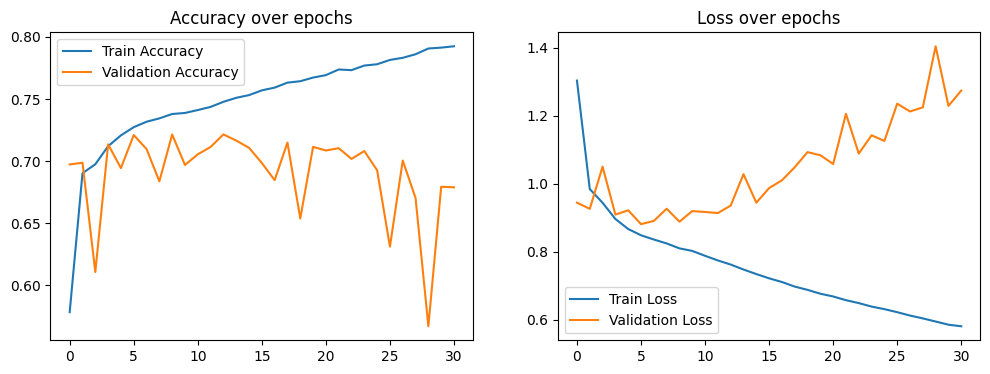

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.68      0.23      0.35      2246
           1       0.00      0.00      0.00       256
           2       0.00      0.00      0.00       512
           3       0.00      0.00      0.00      2244
           4       0.72      0.99      0.83     11924

    accuracy                           0.72     17182
   macro avg       0.28      0.24      0.24     17182
weighted avg       0.59      0.72      0.62     17182



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [130]:
from sklearn.metrics import classification_report

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

# Classification report
y_pred = model.predict(test_input_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

Here the model is overfitting to the dominant class and ignoring minority classes. This is a classic case of severe class imbalance, and simple categorical cross-entropy isn't enough. So we need to address this problem by introducing class weights into the model.

# Handling Class Imbalance of Target column



In [106]:
df['CSAT Score'].value_counts()

,count
CSAT Score,
5,59617
1,11230
4,11219
3,2558
2,1283


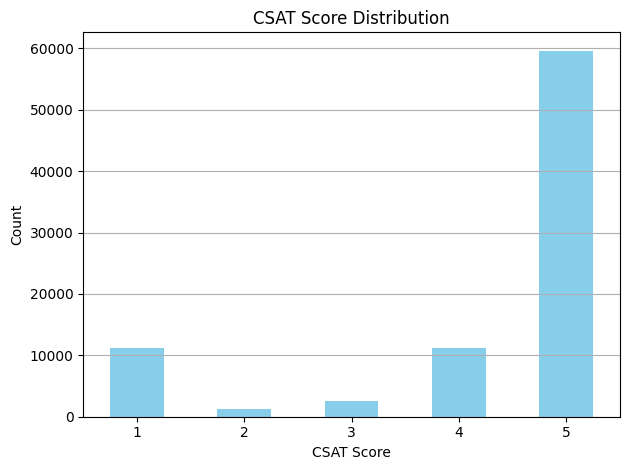

In [90]:
# Plot class distribution

import matplotlib.pyplot as plt

class_counts = df['CSAT Score'].value_counts().sort_index()
class_counts.plot(kind='bar', color='skyblue')
plt.title("CSAT Score Distribution")
plt.xlabel("CSAT Score")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [31]:
# introducing class weights as the classes are heavily imbalanced

from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Convert to 0-based class labels if needed
df['CSAT Score'] = df['CSAT Score'] - 1

# Compute weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(df['CSAT Score']), y=df['CSAT Score'])
class_weight_dict = dict(enumerate(class_weights))

print("Class Weights:", class_weight_dict)


Class Weights: {0: np.float64(1.5299554764024934), 1: np.float64(13.391582229150428), 2: np.float64(6.716731821735731), 3: np.float64(1.5314555664497727), 4: np.float64(0.2881963198416559)}


Focal Loss is a modified version of cross-entropy loss designed to address the problem of class imbalance — especially when a few classes dominate and others are underrepresented. It helps the model pay more attention to the rare, underrepresented classes.
alpha (class weights): manually balances importance of classes.

gamma (focusing): controls how much to focus on hard examples. Higher = more focus.

In [109]:
# focal loss for class imbalance

import tensorflow as tf
from tensorflow.keras import backend as K

def focal_loss(gamma=2., alpha=None, label_smoothing=0.0):
    def loss(y_true, y_pred):
        # Smooth the labels: y_true = y_true * (1 - ε) + ε / num_classes
        num_classes = tf.cast(tf.shape(y_true)[-1], tf.float32)
        y_true_smoothed = y_true * (1.0 - label_smoothing) + (label_smoothing / num_classes)

        y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1.0 - K.epsilon())

        cross_entropy = -y_true_smoothed * tf.math.log(y_pred)

        # Compute focal factor
        focal_factor = tf.pow(1 - y_pred, gamma)
        loss = focal_factor * cross_entropy

        if alpha is not None:
            alpha = tf.constant(alpha, dtype=tf.float32)
            alpha_factor = y_true_smoothed * alpha
            loss = alpha_factor * loss

        return tf.reduce_sum(loss, axis=1)

    return loss



In [117]:

# Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (
    Dense, Dropout, BatchNormalization, Input, Embedding,
    Flatten, Concatenate, TextVectorization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow import keras
K = keras.backend


# Target and input separation
y = df['CSAT Score']-1
X = df.drop('CSAT Score', axis=1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Convert target to categorical
y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

# compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
alpha_weights = (class_weights_array / np.sum(class_weights_array)).tolist()
print("Alpha weights:", alpha_weights)

alpha_weights = class_weights_array / np.sum(class_weights_array)

# Define vocab sizes
MAX_TOKENS = 10000
SUB_CAT_VOCAB = len(df['Sub-category'].unique()) + 1
CITY_VOCAB = len(df['Customer_City'].unique()) + 1
AGENT_VOCAB = len(df['Agent_name'].unique()) + 1
SUPERVISOR_VOCAB = len(df['Supervisor'].unique()) + 1

# Embedding dims
EMBEDDING_DIM = 32
TEXT_EMBEDDING_DIM = 64

# Inputs
numerical_input = Input(shape=(1,), name='item_price')
response_time_input = Input(shape=(1,), name='response_time')
sub_cat_input = Input(shape=(1,), name='sub_category')
city_input = Input(shape=(1,), name='city')
agent_input = Input(shape=(1,), name='agent')
supervisor_input = Input(shape=(1,), name='supervisor')
text_input = Input(shape=(1,), dtype=tf.string, name='remarks')

# Text vectorization
text_vectorizer = TextVectorization(
    max_tokens=MAX_TOKENS,
    output_mode='int',
    output_sequence_length=100
)
text_vectorizer.adapt(X_train['Customer Remarks'])

text_embedding = tf.keras.Sequential([
    text_vectorizer,
    Embedding(input_dim=MAX_TOKENS, output_dim=TEXT_EMBEDDING_DIM),
    tf.keras.layers.GlobalAveragePooling1D()
])(text_input)

# Categorical embeddings
sub_cat_embedding = Flatten()(Embedding(input_dim=SUB_CAT_VOCAB, output_dim=EMBEDDING_DIM)(sub_cat_input))
city_embedding = Flatten()(Embedding(input_dim=CITY_VOCAB, output_dim=EMBEDDING_DIM)(city_input))
agent_embedding = Flatten()(Embedding(input_dim=AGENT_VOCAB, output_dim=EMBEDDING_DIM)(agent_input))
supervisor_embedding = Flatten()(Embedding(input_dim=SUPERVISOR_VOCAB, output_dim=EMBEDDING_DIM)(supervisor_input))

# One-hot input
one_hot_columns = [col for col in X.columns if col.startswith((
    'channel_name_', 'category_', 'Product_category_',
    'Manager_', 'Agent Shift_', 'subcat_'
))]
one_hot_input = Input(shape=(len(one_hot_columns),), name='one_hot_features')

# Merge all
concatenated = Concatenate()([
    numerical_input,
    response_time_input,
    sub_cat_embedding,
    city_embedding,
    agent_embedding,
    supervisor_embedding,
    text_embedding,
    one_hot_input
])

# Dense layers
x = Dense(512, activation='relu')(concatenated)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

x = Dense(256, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)

x = Dense(128, activation='relu')(x)
x = BatchNormalization()(x)
x = Dropout(0.2)(x)

output = Dense(5, activation='softmax')(x)

# Model
model = Model(
    inputs=[
        numerical_input,
        response_time_input,
        sub_cat_input,
        city_input,
        agent_input,
        supervisor_input,
        text_input,
        one_hot_input
    ],
    outputs=output
)

# Compile
alpha_weights = [class_weight_dict[i] for i in range(5)]  # 5 classes

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss= focal_loss_class_balanced(gamma= 1.0, alpha=alpha_weights),
    metrics=['accuracy']
)

# Prepare input
train_input_data = {
    'item_price': X_train['Item_price'].values,
    'response_time': X_train['response_time_hrs'].values,
    'sub_category': X_train['Sub-category'].astype('category').cat.codes.values,
    'city': X_train['Customer_City'].astype('category').cat.codes.values,
    'agent': X_train['Agent_name'].astype('category').cat.codes.values,
    'supervisor': X_train['Supervisor'].astype('category').cat.codes.values,
    'remarks': X_train['Customer Remarks'].values,
    'one_hot_features': X_train[one_hot_columns].values
}

test_input_data = {
    'item_price': X_test['Item_price'].values,
    'response_time': X_test['response_time_hrs'].values,
    'sub_category': X_test['Sub-category'].astype('category').cat.codes.values,
    'city': X_test['Customer_City'].astype('category').cat.codes.values,
    'agent': X_test['Agent_name'].astype('category').cat.codes.values,
    'supervisor': X_test['Supervisor'].astype('category').cat.codes.values,
    'remarks': X_test['Customer Remarks'].values,
    'one_hot_features': X_test[one_hot_columns].values
}

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=25,
    restore_best_weights=True
)





Alpha weights: [0.065239273804278, 0.5707007165118145, 0.28646609768212783, 0.06530469480307896, 0.012289217198700722]


In [118]:
# Train
history = model.fit(
    train_input_data,
    y_train_cat,
    epochs=50,
    batch_size=256,
    validation_split=0.2,
    #callbacks=[early_stopping],
    verbose=1
)

Epoch 1/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.2170 - loss: 1.7525 - val_accuracy: 0.0330 - val_loss: 1.3030
Epoch 2/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.2476 - loss: 1.4013 - val_accuracy: 0.2509 - val_loss: 1.2569
Epoch 3/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.2645 - loss: 1.3664 - val_accuracy: 0.4879 - val_loss: 1.2725
Epoch 4/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - accuracy: 0.3073 - loss: 1.2781 - val_accuracy: 0.3389 - val_loss: 1.2853
Epoch 5/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.3112 - loss: 1.2308 - val_accuracy: 0.4415 - val_loss: 1.3036
Epoch 6/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.3018 - loss: 1.1917 - val_accuracy: 0.3809 - val_loss: 1.3283
Epoch 7/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - accuracy: 0.3133 - loss: 1.0921 - val_accuracy: 0.3528 - val_loss: 1.4213
Epoch 8/50
215/215 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.3080 - loss: 1.0168 - val_

In [119]:
# Evaluate model
test_loss, test_acc = model.evaluate(test_input_data, y_test_cat, verbose=0)
print(f'Test Accuracy: {test_acc:.4f}')


Test Accuracy: 0.2403


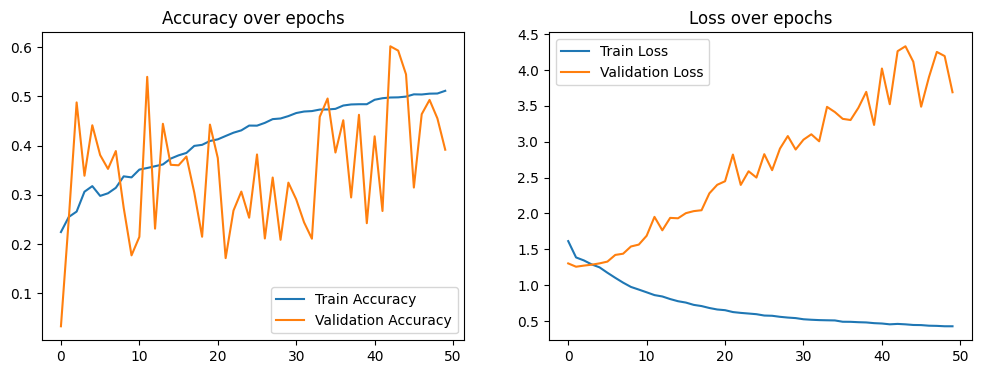

537/537 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
              precision    recall  f1-score   support

           0       0.52      0.14      0.22      2246
           1       0.01      0.02      0.01       256
           2       0.04      0.04      0.04       512
           3       0.14      0.82      0.24      2244
           4       0.76      0.16      0.27     11924

    accuracy                           0.24     17182
   macro avg       0.29      0.23      0.16     17182
weighted avg       0.61      0.24      0.25     17182



In [120]:
from sklearn.metrics import classification_report

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over epochs')
plt.legend()
plt.show()

# Classification report
y_pred = model.predict(test_input_data)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))